##**Sales Analysis Project — Python (Manisha Lakhan)**

About:

Conducted an end-to-end sales performance analysis for a retail dataset using Python with a focus on identifying revenue drivers, customer behavior patterns, and product-level performance. Applied statistical techniques and exploratory analysis to uncover insights that support data-driven business decisions.

Objective:

The objective of this project is to perform a comprehensive Exploratory Data Analysis (EDA) using Python to understand the primary factors influencing sales performance and overall business outcomes. The analysis focuses on examining sales trends over time, identifying top-performing products and categories, understanding customer purchasing behavior, and detecting fluctuations that impact revenue generation. This project showcases the ability to clean, process, analyze, and visualize large datasets using Python, ultimately providing data-driven insights that support strategic decision-making in marketing, inventory management, and operational planning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

sheets = pd.read_excel("C:\\Users\\Manisha\\OneDrive\\Desktop\\Sales Project\\Sales-Analysis-main\\Regional Sales Dataset.xlsx", sheet_name=None)


In [ ]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [ ]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape: ",(df_state_reg.shape))
print("df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [ ]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [ ]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [ ]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [ ]:
#### **Data Cleaning and Wrangling

In [ ]:
# Merge with Customers

df = df_sales.merge(
     df_customers,
     how='left',
     left_on = 'Customer Name Index',
     right_on = 'Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
# Merge with Products

df = df.merge(
     df_products,
     how='left',
     left_on = 'Product Description Index',
     right_on = 'Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
# Merge with Regions

df = df.merge(
     df_regions,
     how='left',
     left_on = 'Delivery Region Index',
     right_on = 'id'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Merge with State Regions

df = df.merge(
     df_state_reg[["State Code", "Region"]],
     how='left',
     left_on = 'state_code',
     right_on = 'State Code'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
# Clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [ ]:
df = df.merge(
     df_budgets,
     how='left',
     on='Product Name'
)

In [ ]:
# Convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
# Keep the important columns and delete the columns that we don't need
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [ ]:
df = df[cols_to_keep]

In [ ]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df = df.rename(columns={
     'ordernumber': 'order_number',
      'orderdate': 'order_date',
      'customer names': 'customer_name',
       'product name': 'product_name',
       'order quantity': 'order_quantity',
        'unit price' : 'unit_price',
        'total_unit_cost' : 'cost',
       'line total': 'revenue',
        'state_code': 'state',
        'state': 'state_name',
        'latitude': 'lat',
         'longitude': 'lon',
         '2017 budgets' : 'budget'
})

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [ ]:
# Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

df[['order_date','product_name', 'revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,<NA>
1,2014-01-01,Product 20,25868.7,<NA>
2,2014-01-01,Product 26,5869.2,<NA>
3,2014-01-01,Product 7,16368.1,<NA>
4,2014-01-01,Product 8,18331.2,<NA>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [ ]:
df['total_cost'] = df['order_quantity'] * df ['total unit cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,<NA>,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,<NA>,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,<NA>,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,<NA>,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,<NA>,10082.160,8249.040,45.0


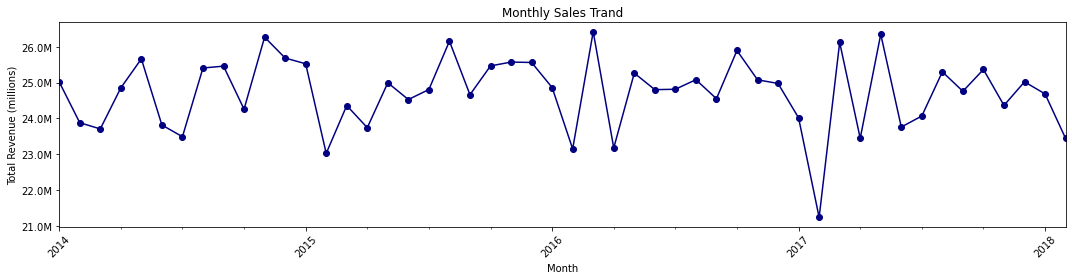

In [ ]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trand')
plt.xlabel('Month')
plt.ylabel('Total Revenue (millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

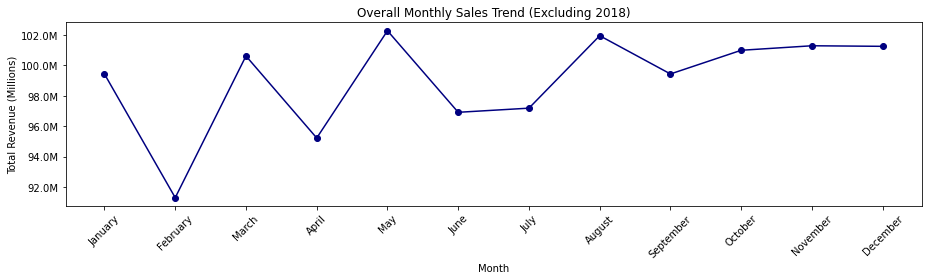

In [ ]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()

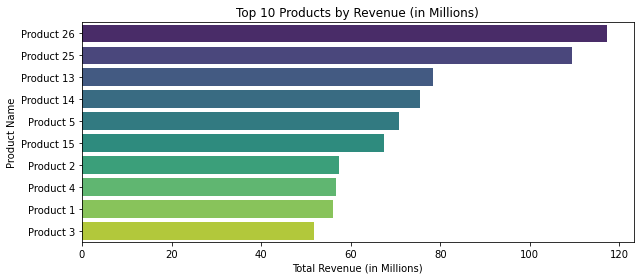

In [ ]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

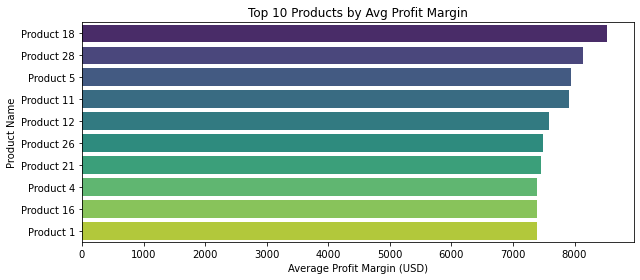

In [ ]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

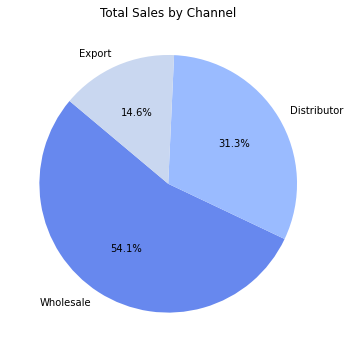

In [ ]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

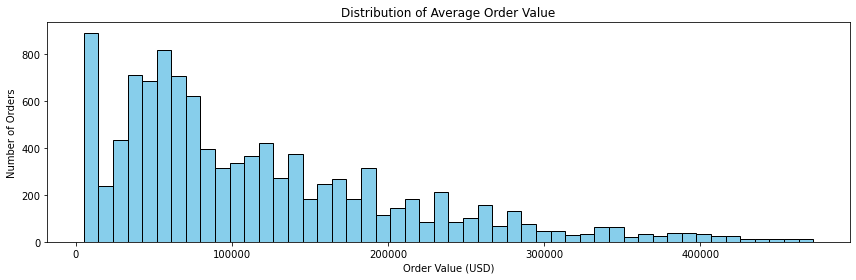

In [ ]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

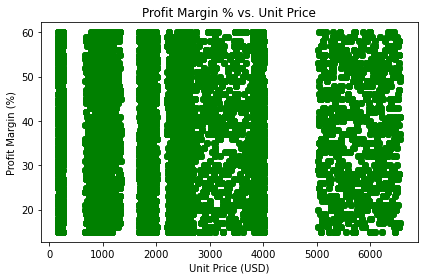

In [ ]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

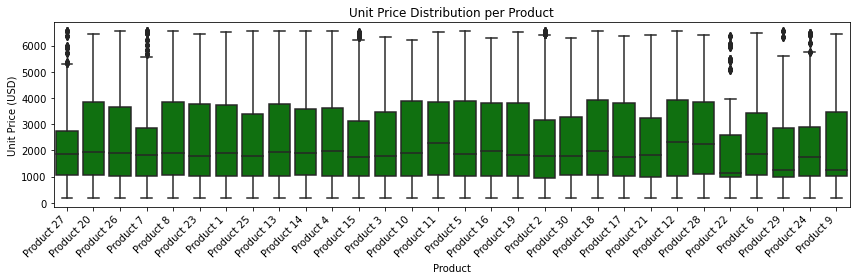

In [ ]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

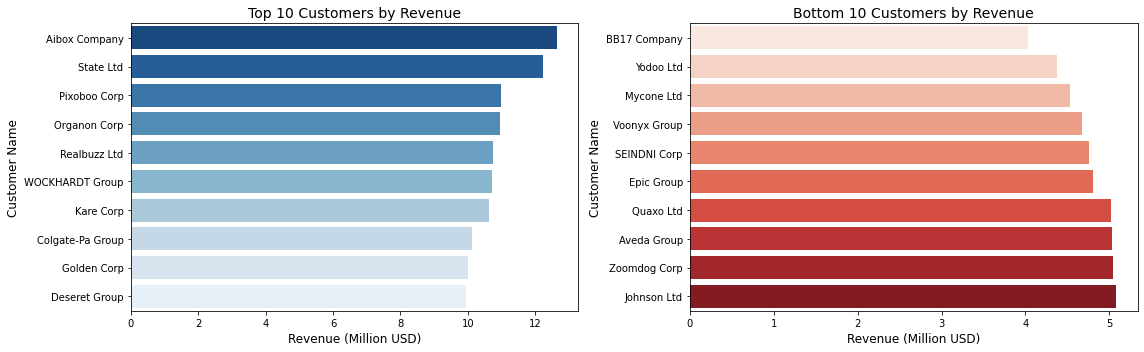

In [ ]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()



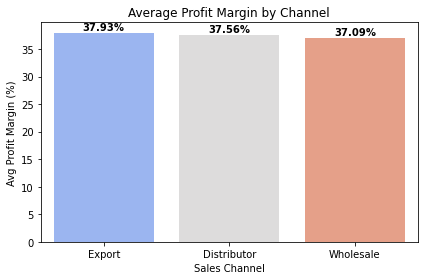

In [ ]:

channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

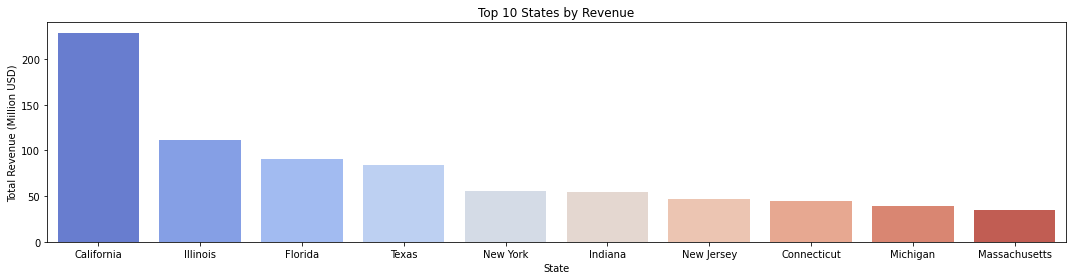

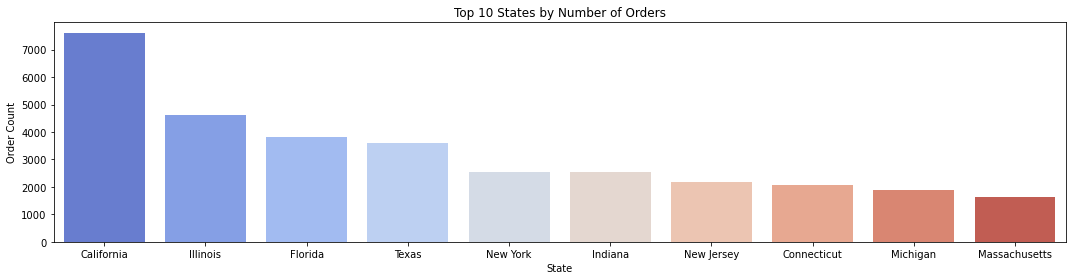

In [ ]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()

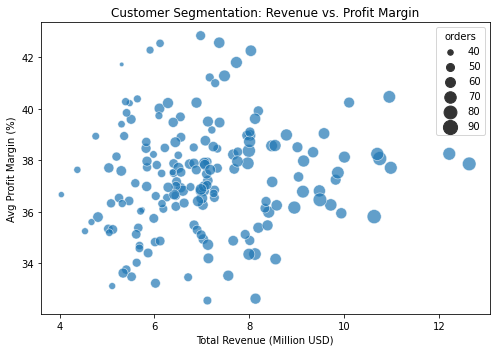

In [ ]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

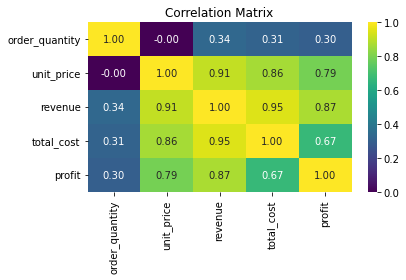

In [ ]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,...,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,2018-02,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,2018-02,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,2018-02,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,2018-02,February,2


In [ ]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)